In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [ ]:
liver_data = pd.read_csv('/content/indian_liver_patient.csv')

In [ ]:
liver_data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [ ]:
liver_data.shape

(583, 11)

In [ ]:
liver_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [ ]:
liver_data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [ ]:
# prompt: remove the null values

liver_data = liver_data.dropna()


In [ ]:
liver_data['Dataset'].value_counts()

Dataset
1    414
2    165
Name: count, dtype: int64

In [ ]:
X = liver_data.drop(columns=['Gender','Dataset'], axis=1)
Y = liver_data['Dataset']

In [ ]:
print(X)

     Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0     65              0.7               0.1                   187   
1     62             10.9               5.5                   699   
2     62              7.3               4.1                   490   
3     58              1.0               0.4                   182   
4     72              3.9               2.0                   195   
..   ...              ...               ...                   ...   
578   60              0.5               0.1                   500   
579   40              0.6               0.1                    98   
580   52              0.8               0.2                   245   
581   31              1.3               0.5                   184   
582   38              1.0               0.3                   216   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                          16                          18             6.8   
1                

In [ ]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
578    2
579    1
580    1
581    1
582    2
Name: Dataset, Length: 579, dtype: int64


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(579, 9) (463, 9) (116, 9)


In [ ]:
model = svm.SVC(kernel='linear')

In [ ]:
model.fit(X_train, Y_train)

SVC(kernel='linear')

In [ ]:
# accuracy score on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

In [ ]:
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  0.7041036717062635


In [ ]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)

In [ ]:
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  0.7586206896551724


In [ ]:

import pickle
pickle.dump(model, open('/content/liver_svm.sav', 'wb'))


In [ ]:

print(liver_data.columns)


Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')


In [ ]:

from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier with 100 trees
rfc = RandomForestClassifier(n_estimators=100)

# Train the random forest classifier on the training data
rfc.fit(X_train, Y_train)

# Predict the labels of the test data
y_pred_rfc = rfc.predict(X_test)

# Calculate the accuracy of the random forest classifier on the test data
accuracy_rfc = accuracy_score(y_pred_rfc, Y_test)

# Print the accuracy of the random forest classifier on the test data
print("Accuracy of the random forest classifier on the test data: {:.3f}".format(accuracy_rfc))

# Calculate the accuracy of the random forest classifier on the training data
accuracy_rfc_train = accuracy_score(rfc.predict(X_train), Y_train)

# Print the accuracy of the random forest classifier on the training data
print("Accuracy of the random forest classifier on the training data: {:.3f}".format(accuracy_rfc_train))


Accuracy of the random forest classifier on the test data: 0.681
Accuracy of the random forest classifier on the training data: 1.000


In [ ]:

# Create a support vector machine classifier with a linear kernel
svm_model = svm.SVC(kernel='linear')

# Train the support vector machine classifier on the training data
svm_model.fit(X_train, Y_train)

# Predict the labels of the test data
y_pred_svm = svm_model.predict(X_test)

# Calculate the accuracy of the support vector machine classifier on the test data
accuracy_svm = accuracy_score(y_pred_svm, Y_test)

# Print the accuracy of the support vector machine classifier on the test data
print("Accuracy of the support vector machine classifier on the test data: {:.3f}".format(accuracy_svm))

# Calculate the accuracy of the support vector machine classifier on the training data
accuracy_svm_train = accuracy_score(svm_model.predict(X_train), Y_train)

# Print the accuracy of the support vector machine classifier on the training data
print("Accuracy of the support vector machine classifier on the training data: {:.3f}".format(accuracy_svm_train))


Accuracy of the support vector machine classifier on the test data: 0.759
Accuracy of the support vector machine classifier on the training data: 0.704


In [ ]:

from sklearn.tree import DecisionTreeClassifier

# Create a decision tree classifier
dt_model = DecisionTreeClassifier()

# Train the decision tree classifier on the training data
dt_model.fit(X_train, Y_train)

# Predict the labels of the test data
y_pred_dt = dt_model.predict(X_test)

# Calculate the accuracy of the decision tree classifier on the test data
accuracy_dt = accuracy_score(y_pred_dt, Y_test)

# Print the accuracy of the decision tree classifier on the test data
print("Accuracy of the decision tree classifier on the test data: {:.3f}".format(accuracy_dt))

# Calculate the accuracy of the decision tree classifier on the training data
accuracy_dt_train = accuracy_score(dt_model.predict(X_train), Y_train)

# Print the accuracy of the decision tree classifier on the training data
print("Accuracy of the decision tree classifier on the training data: {:.3f}".format(accuracy_dt_train))


Accuracy of the decision tree classifier on the test data: 0.647
Accuracy of the decision tree classifier on the training data: 1.000


In [ ]:

from sklearn.naive_bayes import GaussianNB

# Create a Naive Bayes classifier
nb_model = GaussianNB()

# Train the Naive Bayes classifier on the training data
nb_model.fit(X_train, Y_train)

# Predict the labels of the test data
y_pred_nb = nb_model.predict(X_test)

# Calculate the accuracy of the Naive Bayes classifier on the test data
accuracy_nb = accuracy_score(y_pred_nb, Y_test)

# Print the accuracy of the Naive Bayes classifier on the test data
print("Accuracy of the Naive Bayes classifier on the test data: {:.3f}".format(accuracy_nb))

# Calculate the accuracy of the Naive Bayes classifier on the training data
accuracy_nb_train = accuracy_score(nb_model.predict(X_train), Y_train)

# Print the accuracy of the Naive Bayes classifier on the training data
print("Accuracy of the Naive Bayes classifier on the training data: {:.3f}".format(accuracy_nb_train))


Accuracy of the Naive Bayes classifier on the test data: 0.534
Accuracy of the Naive Bayes classifier on the training data: 0.553


In [ ]:

from sklearn.linear_model import LogisticRegression

# Create a logistic regression model
lr_model = LogisticRegression()

# Train the logistic regression model on the training data
lr_model.fit(X_train, Y_train)

# Predict the labels of the test data
y_pred_lr = lr_model.predict(X_test)

# Calculate the accuracy of the logistic regression model on the test data
accuracy_lr = accuracy_score(y_pred_lr, Y_test)

# Print the accuracy of the logistic regression model on the test data
print("Accuracy of the logistic regression model on the test data: {:.3f}".format(accuracy_lr))

# Calculate the accuracy of the logistic regression model on the training data
accuracy_lr_train = accuracy_score(lr_model.predict(X_train), Y_train)

# Print the accuracy of the logistic regression model on the training data
print("Accuracy of the logistic regression model on the training data: {:.3f}".format(accuracy_lr_train))


Accuracy of the logistic regression model on the test data: 0.750
Accuracy of the logistic regression model on the training data: 0.717


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:

from sklearn.ensemble import VotingClassifier

# Create a voting classifier with the models we have trained
voting_model = VotingClassifier(estimators=[('rfc', rfc), ('svm', svm_model), ('dt', dt_model), ('nb', nb_model), ('lr', lr_model)], voting='hard')

# Train the voting classifier on the training data
voting_model.fit(X_train, Y_train)

# Predict the labels of the test data
y_pred_voting = voting_model.predict(X_test)

# Calculate the accuracy of the voting classifier on the test data
accuracy_voting = accuracy_score(y_pred_voting, Y_test)

# Print the accuracy of the voting classifier on the test data
print("Accuracy of the voting classifier on the test data: {:.3f}".format(accuracy_voting))

# Calculate the accuracy of the voting classifier on the training data
accuracy_voting_train = accuracy_score(voting_model.predict(X_train), Y_train)

# Print the accuracy of the voting classifier on the training data
print("Accuracy of the voting classifier on the training data: {:.3f}".format(accuracy_voting_train))


Accuracy of the voting classifier on the test data: 0.690
Accuracy of the voting classifier on the training data: 0.987


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:

from sklearn.ensemble import StackingClassifier

# Define the base models
base_models = [
    ('rfc', RandomForestClassifier(n_estimators=100)),
    ('svm', svm.SVC(kernel='linear')),
    ('dt', DecisionTreeClassifier()),
    ('nb', GaussianNB()),
    ('lr', LogisticRegression()),
]

# Define the meta model
meta_model = svm.SVC(kernel='linear')

# Create the stacking classifier
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Train the stacking classifier on the training data
stacking_model.fit(X_train, Y_train)

# Predict the labels of the test data
y_pred_stacking = stacking_model.predict(X_test)

# Calculate the accuracy of the stacking classifier on the test data
accuracy_stacking = accuracy_score(y_pred_stacking, Y_test)

# Print the accuracy of the stacking classifier on the test data
print("Accuracy of the stacking classifier on the test data: {:.3f}".format(accuracy_stacking))

# Calculate the accuracy of the stacking classifier on the training data
accuracy_stacking_train = accuracy_score(stacking_model.predict(X_train), Y_train)

# Print the accuracy of the stacking classifier on the training data
print("Accuracy of the stacking classifier on the training data: {:.3f}".format(accuracy_stacking_train))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of the stacking classifier on the test data: 0.759
Accuracy of the stacking classifier on the training data: 0.704


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:

from sklearn.ensemble import GradientBoostingClassifier

# Create a Gradient Boosting Machine model
gbm_model = GradientBoostingClassifier()

# Train the Gradient Boosting Machine model on the training data
gbm_model.fit(X_train, Y_train)

# Predict the labels of the test data
y_pred_gbm = gbm_model.predict(X_test)

# Calculate the accuracy of the Gradient Boosting Machine model on the test data
accuracy_gbm = accuracy_score(y_pred_gbm, Y_test)

# Print the accuracy of the Gradient Boosting Machine model on the test data
print("Accuracy of the Gradient Boosting Machine model on the test data: {:.3f}".format(accuracy_gbm))

# Calculate the accuracy of the Gradient Boosting Machine model on the training data
accuracy_gbm_train = accuracy_score(gbm_model.predict(X_train), Y_train)

# Print the accuracy of the Gradient Boosting Machine model on the training data
print("Accuracy of the Gradient Boosting Machine model on the training data: {:.3f}".format(accuracy_gbm_train))


Accuracy of the Gradient Boosting Machine model on the test data: 0.767
Accuracy of the Gradient Boosting Machine model on the training data: 0.931


In [ ]:

# Import the required libraries
from sklearn.ensemble import VotingClassifier

# Define the base models
base_models = [
    ('rfc', RandomForestClassifier(n_estimators=100)),
    ('svm', svm.SVC(kernel='linear')),
    ('dt', DecisionTreeClassifier()),
    ('nb', GaussianNB()),
    ('lr', LogisticRegression()),
    ('gbm', GradientBoostingClassifier()),
]

# Define the meta model
meta_model = VotingClassifier(estimators=base_models, voting='hard')

# Train the ensemble model on the training data
meta_model.fit(X_train, Y_train)

# Predict the labels of the test data
y_pred_ensemble = meta_model.predict(X_test)

# Calculate the accuracy of the ensemble model on the test data
accuracy_ensemble_test = accuracy_score(y_pred_ensemble, Y_test)

# Calculate the accuracy of the ensemble model on the training data
accuracy_ensemble_train = accuracy_score(meta_model.predict(X_train), Y_train)

# Print the accuracy of the ensemble model on the test and training data
print("Accuracy of the ensemble model on the test data: {:.3f}".format(accuracy_ensemble_test))
print("Accuracy of the ensemble model on the training data: {:.3f}".format(accuracy_ensemble_train))


Accuracy of the ensemble model on the test data: 0.750
Accuracy of the ensemble model on the training data: 0.940


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


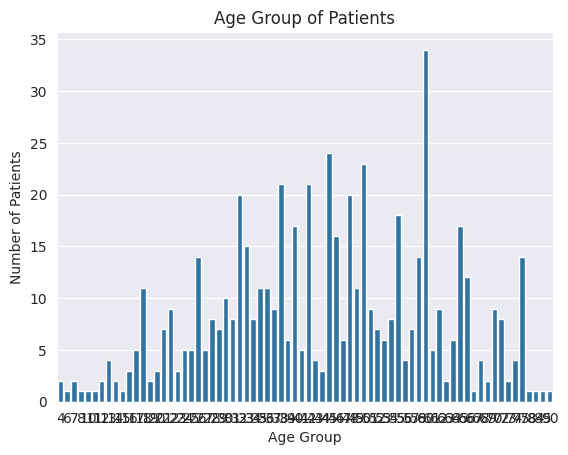

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar chart of the age groups
sns.set_style('darkgrid')
sns.barplot(x=liver_data['Age'].value_counts().index, y=liver_data['Age'].value_counts().values)

# Add a title and labels to the chart
plt.title('Age Group of Patients')
plt.xlabel('Age Group')
plt.ylabel('Number of Patients')

# Show the chart
plt.show()


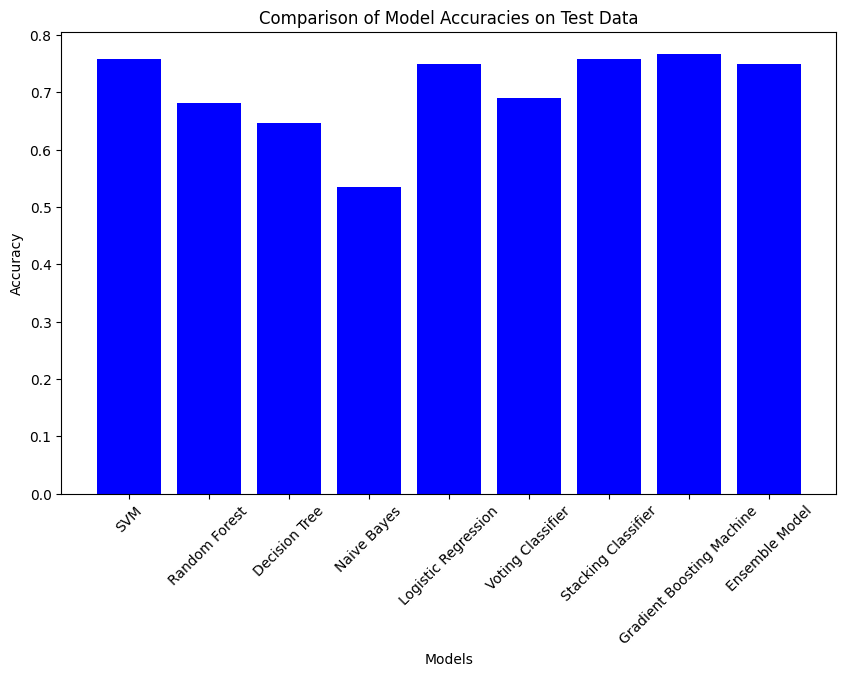

In [ ]:


import matplotlib.pyplot as plt

# Define the models and their corresponding accuracies
models = [
    "SVM",
    "Random Forest",
    "Decision Tree",
    "Naive Bayes",
    "Logistic Regression",
    "Voting Classifier",
    "Stacking Classifier",
    "Gradient Boosting Machine",
    "Ensemble Model",
]

accuracies = [
    accuracy_svm,
    accuracy_rfc,
    accuracy_dt,
    accuracy_nb,
    accuracy_lr,
    accuracy_voting,
    accuracy_stacking,
    accuracy_gbm,
    accuracy_ensemble_test,
]

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color='blue')

# Add labels and title
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Comparison of Model Accuracies on Test Data")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the chart
plt.show()


In [ ]:
import pickle

In [ ]:
filename = 'liver_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
for column in X.columns:
  print(column)

Age
Total_Bilirubin
Direct_Bilirubin
Alkaline_Phosphotase
Alamine_Aminotransferase
Aspartate_Aminotransferase
Total_Protiens
Albumin
Albumin_and_Globulin_Ratio
